In [5]:
import pandas as pd
import numpy as np 


#Visualizar Arvore de decisão
import pydotplus|
import matplotlib.image as mpimg
from sklearn import tree

#Gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


#Algoritmos de Classificação
from sklearn import tree
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

#Treinamento e Medidas
from sklearn.model_selection import train_test_split
from sklearn import metrics

SyntaxError: invalid syntax (<ipython-input-5-6e186e717651>, line 6)

In [6]:
Database = pd.read_csv('C:/Users/lucas/Downloads/Pessoal/Inteligência Artificial/Trabalho Final IA/drug200.csv')


In [7]:
Database.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
Database.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [9]:
#Váriavel tipo de Medicamento
print("Proporção de Remédios")
print("{}".format(Database.Drug.value_counts()))

Proporção de Remédios
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


<Figure size 648x360 with 0 Axes>

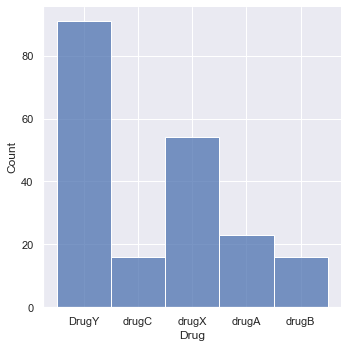

In [10]:
plt.figure(figsize = (9,5))
sns.displot(Database.Drug)
plt.show()

In [11]:
#Proporção de Sódio para Potássio presente no sangue
print("Maior Proporção de Sódio para Potássio {}".format(Database.Na_to_K.max()))
print("Menor Proporção de Sódio para Potássio {}".format(Database.Na_to_K.min()))
print("Média da Proporção de Sódio para Potássio {}".format(Database.Na_to_K.mean()))

Maior Proporção de Sódio para Potássio 38.247
Menor Proporção de Sódio para Potássio 6.269
Média da Proporção de Sódio para Potássio 16.084485


<Figure size 648x360 with 0 Axes>

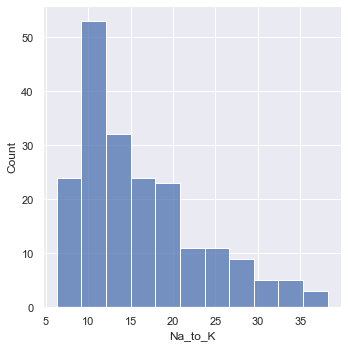

In [12]:
plt.figure(figsize = (9,5))
sns.displot(Database.Na_to_K)
plt.show()

In [13]:
#Variável Nivel de Colesterol
print("Quantidade de pessoas com colesterol alto e baixo")
print("{}".format(Database.Cholesterol.value_counts()))

Quantidade de pessoas com colesterol alto e baixo
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


<Figure size 1080x360 with 0 Axes>

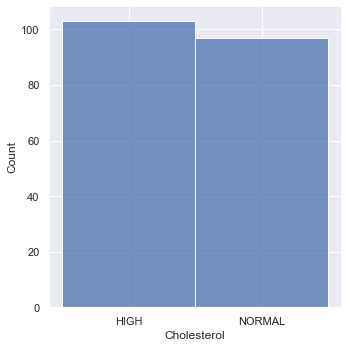

In [14]:
plt.figure(figsize = (15,5))
sns.displot(Database.Cholesterol)
plt.show()

In [15]:
#Nível da Pressão Arterial 
print("Quantidade de pessoas com os nível de pressão alto e baixo e Normal")
print("{}".format(Database.BP.value_counts()))

Quantidade de pessoas com os nível de pressão alto e baixo e Normal
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


<Figure size 720x360 with 0 Axes>

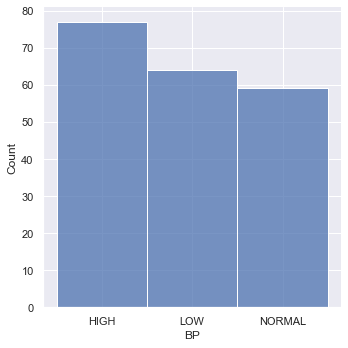

In [17]:
plt.figure(figsize = (10,5))
sns.displot(Database.BP)
plt.show()

In [18]:
#Sexo 
print("Sexo dos Pacientes")
print("{}".format(Database.Sex.value_counts()))

Sexo dos Pacientes
M    104
F     96
Name: Sex, dtype: int64


<Figure size 720x360 with 0 Axes>

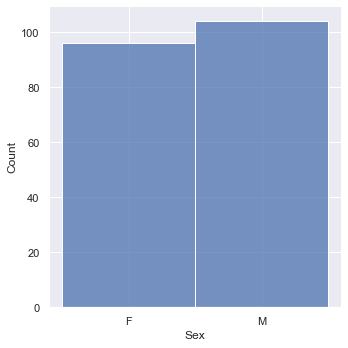

In [19]:
plt.figure(figsize = (10,5))
sns.displot(Database.Sex)
plt.show()

In [20]:
#Variável Idade
print("Maior idade {}".format(Database.Age.max()))
print("Menor idade {}".format(Database.Age.min()))
print("Média da Idades {}".format(Database.Age.mean()))

Maior idade 74
Menor idade 15
Média da Idades 44.315


c:\users\lucas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


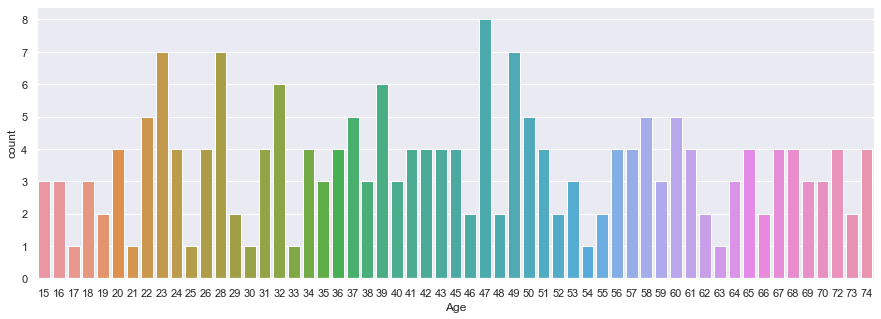

In [21]:
plt.figure(figsize = (15,5))
sns.countplot(Database.Age)
plt.show()

In [22]:
# Comparação entre as váriaveis do dataset
# Idade ~~ Tipo de Rémedio
# Sexo ~~ Tipo de Rémedio
# Pressão arterial ~~ Tipo de Rémedio
# Colesterol ~~ Tipo de Rémedio
# Proporção Sódio e Potácio no sangue ~~ Tipo de Rémedio

Text(0.5, 1.0, 'Idade ~~ Tipo de Rémedio')

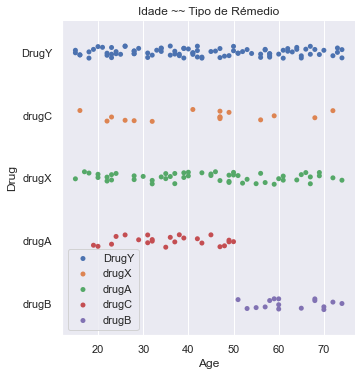

In [23]:
# Idade ~~ Tipo de Rémedio


sns.catplot(x = 'Age', y ='Drug', data = Database)
plt.legend(Database.Drug.value_counts().index)
plt.title("Idade ~~ Tipo de Rémedio")

In [24]:
print("Através do Gráfico percebemos que o RemédioB só é usado em pessoas maiores de {} anos".format(Database.Age[Database.Drug == "drugB"].min()))
print("Através do Gráfico percebemos que o RemédioA só é usado em pessoas menores de {} anos".format(Database.Age[Database.Drug == "drugA"].max()))
print("Os RemédiosY,RemédiosX,RemédiosC, aparecem em toda faixa etária alguns com frenquências maiores e outros com frequências menores ")

Através do Gráfico percebemos que o RemédioB só é usado em pessoas maiores de 51 anos
Através do Gráfico percebemos que o RemédioA só é usado em pessoas menores de 50 anos
Os RemédiosY,RemédiosX,RemédiosC, aparecem em toda faixa etária alguns com frenquências maiores e outros com frequências menores 


Sex  Drug 
F    DrugY    47
     drugX    27
     drugA     9
     drugC     7
     drugB     6
M    DrugY    44
     drugX    27
     drugA    14
     drugB    10
     drugC     9
Name: Drug, dtype: int64


Text(0.5, 1.0, 'Sexo ~~ Tipo de Remédio')

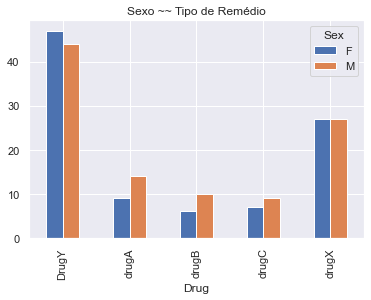

In [25]:
# Sexo ~~ Tipo de Rémedio

sexo_Remedio = Database.groupby('Sex').Drug.value_counts()
print(sexo_Remedio)
sexo_Remedio.unstack(level=0).plot(kind='bar', subplots=False)
plt.title("Sexo ~~ Tipo de Remédio")

In [26]:
print("No geral os homens são mais medicados do que as mulheres, pois estão em maior quantidade. Com isso, é possível concluir que o Sexo não é um fator decisivo para classificação do Rémedio")

No geral os homens são mais medicados do que as mulheres, pois estão em maior quantidade. Com isso, é possível concluir que o Sexo não é um fator decisivo para classificação do Rémedio


BP      Drug 
HIGH    DrugY    38
        drugA    23
        drugB    16
LOW     DrugY    30
        drugX    18
        drugC    16
NORMAL  drugX    36
        DrugY    23
Name: Drug, dtype: int64


Text(0.5, 1.0, 'Pressão arterial ~~ Tipo de Rémedio')

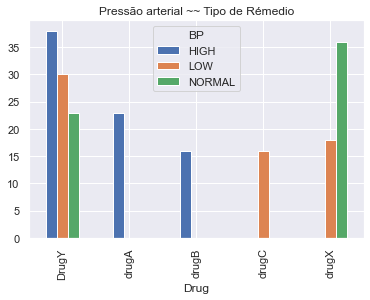

In [27]:
# Pressão arterial ~~ Tipo de Rémedio

PA_Remedio = Database.groupby('BP').Drug.value_counts()
print(PA_Remedio)


PA_Remedio.unstack(level=0).plot(kind='bar', subplots=False)
plt.title("Pressão arterial ~~ Tipo de Rémedio")

In [28]:
print("Podemos Perceber que os Remédios A e B só são receitas quando o nível da Pressão está alta")
print("O Remédio C só é receitado quando a Pressão esta Baixa")
print("O Remedio X não é receitado quando os pacientes tem Pressão Alta")

Podemos Perceber que os Remédios A e B só são receitas quando o nível da Pressão está alta
O Remédio C só é receitado quando a Pressão esta Baixa
O Remedio X não é receitado quando os pacientes tem Pressão Alta


Cholesterol  Drug 
HIGH         DrugY    47
             drugX    20
             drugC    16
             drugA    12
             drugB     8
NORMAL       DrugY    44
             drugX    34
             drugA    11
             drugB     8
Name: Drug, dtype: int64


Text(0.5, 1.0, 'Colesterol ~~ Tipo de Rémedio')

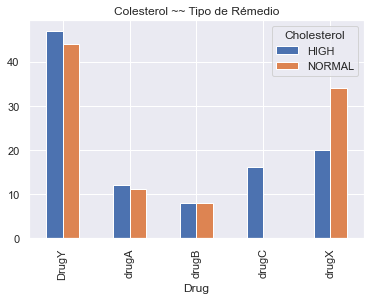

In [29]:
# Colesterol ~~ Tipo de Rémedio

Colesterol_Remedio = Database.groupby('Cholesterol').Drug.value_counts()
print(Colesterol_Remedio)

Colesterol_Remedio.unstack(level=0).plot(kind='bar', subplots=False)
plt.title("Colesterol ~~ Tipo de Rémedio")

In [30]:
print("No geral todos os Rémedios são usados nos dois níveis de colesterol, exceto no Rémedio C que só é utilizada quando o colesterol está alto, logo o nível de colesterol é importante para classificação do Remédio C")

No geral todos os Rémedios são usados nos dois níveis de colesterol, exceto no Rémedio C que só é utilizada quando o colesterol está alto, logo o nível de colesterol é importante para classificação do Remédio C


Text(0.5, 1.0, 'Proporção Sódio e Potácio no sangue ~~ Tipo de Rémedio')

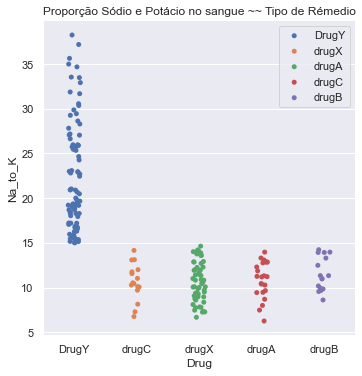

In [31]:
# Proporção Sódio e Potácio no sangue ~~ Tipo de Rémedio

sns.catplot(x = 'Drug', y ='Na_to_K', data = Database)
plt.legend(Database.Drug.value_counts().index)
plt.title("Proporção Sódio e Potácio no sangue ~~ Tipo de Rémedio")

In [32]:
print("O Remédio Y só é utilizado quando a proporção de Sódio e Potácio no sangue esta acima de 15, diferentes dos demais que só são receitados quando a proporção está menor do que 15")
print("logo percebemos que assim como a idade a Proporção Sódio e Potácio no sangue é uma caracteristica importante na classificação do Remédio")

O Remédio Y só é utilizado quando a proporção de Sódio e Potácio no sangue esta acima de 15, diferentes dos demais que só são receitados quando a proporção está menor do que 15
logo percebemos que assim como a idade a Proporção Sódio e Potácio no sangue é uma caracteristica importante na classificação do Remédio


In [33]:
# Processamento dos Dados
#Mudando os valores das Strings para Inteiro nas colunas Sexo, Pressão Arterial e Colesterol

for coluna in Database:
    print(coluna)
    print(Database[coluna].unique())
    print()

Age
[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]

Sex
['F' 'M']

BP
['HIGH' 'LOW' 'NORMAL']

Cholesterol
['HIGH' 'NORMAL']

Na_to_K
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 

In [34]:
#Tratamento de Dados transformando Strings em Inteiros
le=LabelEncoder()

In [35]:
for i in list(Database.columns):
    if Database[i].dtype=='object':
        Database[i]=le.fit_transform(Database[i])

In [36]:
for coluna in Database:
    print(coluna)
    print(Database[coluna].unique())
    print()

Age
[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]

Sex
[0 1]

BP
[0 1 2]

Cholesterol
[0 1]

Na_to_K
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.294  8.968 11.953 20.013  9.6

In [37]:
y=Database['Drug']
x=Database.drop(['Drug'],axis=1)
TrainScoreAlgoritmos = {}
TestScoreAlgortimos = {}

In [38]:
#Treinamento
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.2)

In [39]:
print("X_train shape:",x_train.shape)
print("X_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (160, 5)
X_test shape: (40, 5)
y_train shape: (160,)
y_test shape: (40,)


In [40]:
# Primeiro Algoritmo KNN

lista = []
for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    accuracies = cross_val_score(knn, x_train, y_train, cv=5)
    knn.fit(x_train,y_train)
    
    pred_s=knn.predict(x_test)
    
    scores=metrics.accuracy_score(y_test,pred_s)
    
    lista.append(scores)
maiorScore =  max(lista)
print("Média do Train Score:",np.mean(accuracies))
print("Melhor Taxa de Acerto : ", maiorScore)

Média do Train Score: 0.65
Melhor Taxa de Acerto :  0.675


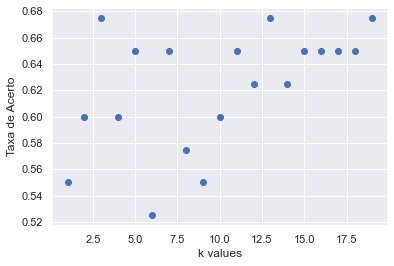

In [41]:
TrainScoreAlgoritmos["KNN Treino Score"] = np.mean(accuracies)
TestScoreAlgortimos["KNN Teste Score"] = maiorScore
plt.scatter(range(1,20),lista)
plt.xlabel('k values')
plt.ylabel('Taxa de Acerto')
plt.show()

In [42]:
# Segundo Algoritmo Floresta Aleatórias


RD = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(RD, x_train, y_train, cv=5)
RD.fit(x_train,y_train)



print("Média do Train Score:",np.mean(accuracies))
print()
print("Porcentagem de Acerto:",RD.score(x_test,y_test))

TrainScoreAlgoritmos["Random Forest Treino Score"] = np.mean(accuracies)
TestScoreAlgortimos["Random Forest Teste Score"] = RD.score(x_test,y_test)

Média do Train Score: 0.9875

Porcentagem de Acerto: 1.0


In [43]:
# Terceiro Algoritmo SVM

SVM = svm.SVC(random_state = 42)
accuracies = cross_val_score(SVM, x_train, y_train, cv=5)
SVM.fit(x_train,y_train)



print("Média do Train Score:",np.mean(accuracies))
print("Porcentagem de Acerto:",SVM.score(x_test,y_test))

TrainScoreAlgoritmos["SVM Treino Score"] = np.mean(accuracies)
TestScoreAlgortimos["SVM Teste Score"] = SVM.score(x_test,y_test)

Média do Train Score: 0.7
Porcentagem de Acerto: 0.675


In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

SVMGRID  = svm.SVC();
SVMBEST = GridSearchCV(SVMGRID, grid, cv = 5)
SVMBEST.fit(x_train,y_train)
print("Best Parameters:",SVMBEST.best_params_)
print("Train Score:",SVMBEST.best_score_)
print("Test Score:",SVMBEST.score(x_test,y_test))

TrainScoreAlgoritmos["SVMGRID Treino Score"] = SVMBEST.best_score_
TestScoreAlgortimos["SVMGRID Teste Score"] = SVMBEST.score(x_test,y_test)

In [ ]:
ResultadoTrain = Database.from_dict(TrainScoreAlgoritmos,orient = "index",columns=["Score"])
ResultadoTeste = Database.from_dict(TestScoreAlgortimos,orient = "index",columns=["Score"])


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = ResultadoTrain.index,y = ResultadoTrain.Score,ax = ax[0])
sns.barplot(x = ResultadoTeste.index,y = ResultadoTeste.Score,ax = ax[1])
ax[0].set_xticklabels(ResultadoTrain.index,rotation = 75)
ax[1].set_xticklabels(ResultadoTeste.index,rotation = 75)
plt.show()